==============================================================================================
## Practicum 4: Descriptors extraction for object detection, based on template matching, ORB, and HOG
==============================================================================================

In this laboratory we will treat the following main topics:

1) Template matching
    - Normalized Cross-correlation
    - Application to object (eye) detection 

2) Image Descriptors: "Sliding window" and HOG image descriptor
   - Application to object (car) detection

3) Image matching (recognition by correspondance) based on feature extraction (ORB)
    - Application to object (logo) detection
    
In order to complete this practicum, the following concepts need to be understood: template matching, feature localization (Harris, Censure), feature descriptor (HOG,ORB, Sift) methods.

All code should be commented in English. Answers of the questions and comments on the exercises should be given in English too.

It is highly recommendable to structure the code in functions in order to reuse code for different tests and images and make it shorter and more readable. Specially the visualization commands should be encapsulated in separate functions.

In [47]:
from skimage.color import rgb2gray
from skimage.feature import hog, match_descriptors, match_template, ORB, plot_matches
from skimage.transform import AffineTransform, rotate, warp
from skimage import color, exposure, io, img_as_float
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [48]:
def visualize_image(image, title):
    
    """
    Function that visualizes only one image and its corresponding title above.
    """
    
    plt.imshow(image, cmap="gray")
    plt.title(title)
    plt.axis("off")
    
    plt.show()

In [49]:
def visualize_image_group(images, titles):
    
    """
    Given a list of images and its corresponding titles,
    shows all the images in a row with each title above.
    """
    
    f, axarr = plt.subplots(1, len(images))
    f.set_size_inches(15, 15)
    
    for i in range(len(images)):
    
        axarr[i].imshow(images[i], cmap='gray')
        axarr[i].set_title(titles[i])
        
        axarr[i].xaxis.set_visible(False)
        axarr[i].yaxis.set_visible(False)
        
    plt.show()

## 4.1 Template matching

4.1.1 Given the image 'einstein.png' and the template 'eye.png', detect the location of the template in the image comparing the use of:
- euclidean distance (hint: norm() in numpy.linalg).
- normalized cross-correlation (hint: match_template() of skimage.feature).

Hint: you can take as an example, the template matching on the [coin exercise](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_template.html#sphx-glr-auto-examples-features-detection-plot-template-py) in skimage.
Don't forget to normalize the images (having pixel values between [0,1]) before comparing them.

In [50]:
def threshold_euclidean(result, threshold):
    
    """
    Function that shows the parts of the result image that have lower values than the threshold.
    """
    
    return result < threshold

In [51]:
def euclidean_distance(image, template, threshold):
    
    image = img_as_float(image)
    template = img_as_float(template)
    
    # Get the difference of weight ang height of both images.
    dimensions = [image.shape[i] - template.shape[i] for i in range(2)]
    
    # The result will be stored in a matrix.
    result = np.ones(dimensions)
    
    # For all the pixels of the image.
    for i in range(dimensions[0]):
        for j in range(dimensions[1]):
            
            # Apply the filter to a concrete region of the image.
            region = image[i: i + template.shape[0], j: j + template.shape[1]] - template
            result[i][j] = np.linalg.norm(region)
            
    # Return the resultant image and the image that shows where the template is.
    return [result, threshold_euclidean(result, threshold)]

In [52]:
def threshold_crossc(result, threshold):
    
    """
    Function that shows the parts of the result image that have higher values than the threshold.
    """
    
    return result > threshold

In [53]:
def cross_correlation(image, template, threshold):
    
    image = img_as_float(image)
    template = img_as_float(template)
    
    # Apply the filter.
    result = match_template(image, template)
    
    # Return the resultant image and the image that shows where the template is.
    return [result, threshold_crossc(result, threshold)]

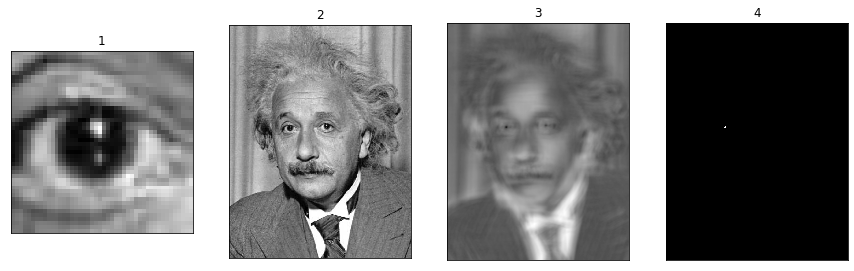

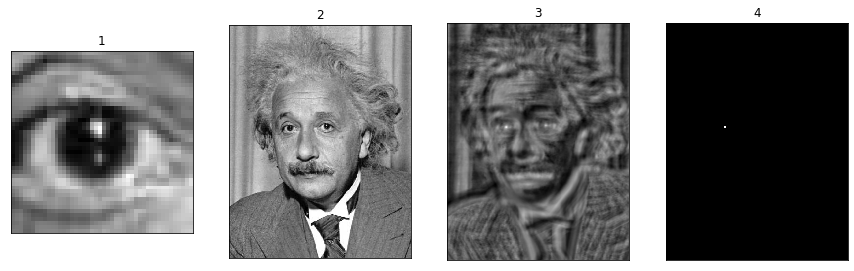

In [54]:
# Import the images.
einstein = io.imread("images/einstein.png")
eye = io.imread("images/eye.png")

# And convert to gray scale.
image = rgb2gray(einstein)
template = rgb2gray(eye)

# First, we get the results of the euclidean distance algorithm.
result = euclidean_distance(image, template, threshold=7)

# Store them neatly.
images = [template, image] + euclidean_distance(image, template, threshold=7)
titles = ["1", "2", "3", "4"]

# And visualize it all.
visualize_image_group(images, titles)

# Second, we get the results of the cross correlation algorithm and store it neatly.
images = [template, image] + cross_correlation(image, template, threshold=0.65)
titles = ["1", "2", "3", "4"]

# And visualize it all.
visualize_image_group(images, titles)

4.1.2 How does the result of the template matching change if the image changes its contrast (for example if you make it clearer or darker)? To this purpose, read the images "einstein_br.png" and "einstein_mask.png".

Visualize the normalized cross-correlation image between the template and the image as well as this very same image in a binarized form in order to show where is the minimal distance between the template and the image. 
* How does the minimum distance between the template and the image change? 
* What are the minimal distance pixels in the correlation images? 
* What are the distances between the template and the image around the eyes of the image? 

Use titles of the figures to explain what is displayed.


In [55]:
einstein_br = io.imread("images/einstein_br.png")
einstein_mask = io.imread("images/einstein_mask.png")

image = rgb2gray(einstein_mask)
template = rgb2gray(eye)

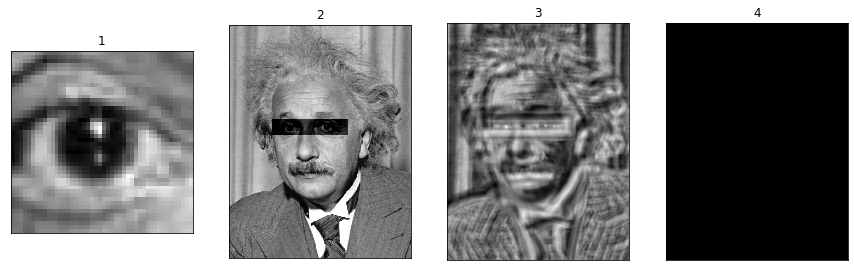

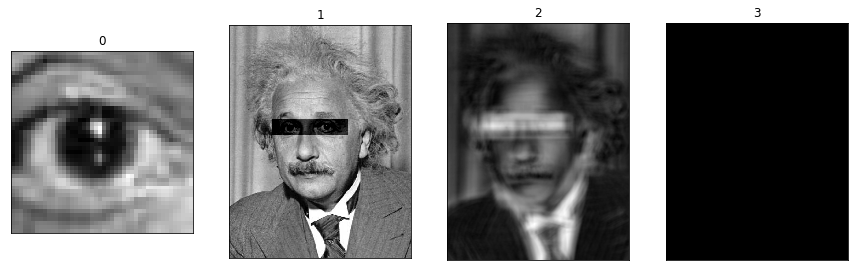

In [56]:
result = cross_correlation(image, template, threshold=0.65)
images = [template, image] + result
titles = ["1", "2", "3", "4"]

visualize_image_group(images, titles)

result = euclidean_distance(image,  template, threshold=7)
images = [template, image] + result
titles = [str(i) for i in range(4)]

visualize_image_group(images, titles)

**QUESTIONS:**

**How does the minimum distance between the template and the image change?**

The minimum distance between the template and the image change from 0 to 1.
When the template matches with the image the minimum distance is 0, in the case that it doesn't match then the distance depends on the difference of the template and the image with a maximum value of 1


**What are the minimal distance pixels in the correlation images?**



**What are the distances between the template and the image around the eyes of the image?**




4.1.3 How does the result of the template matching changes if instead the template is the one that changes its contrast (for example if you make it clearer or darker)? To this purpose, use the 'eye_br.png' template.

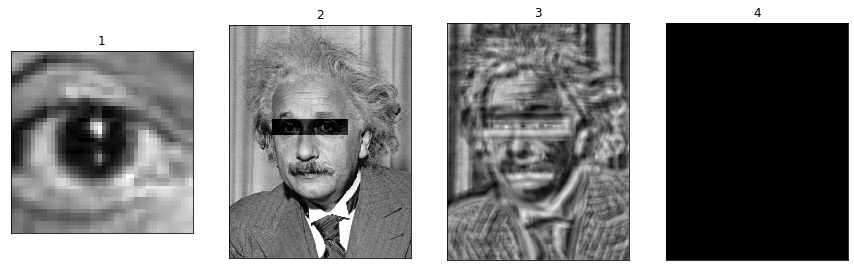

In [57]:
einstein_mask=io.imread('./images/einstein_mask.png')
eye_br = io.imread("images/eye_br.png")

gray_mask = color.rgb2gray(einstein_mask)
gray_template = color.rgb2gray(eye_br)

cross_correlation(gray_mask, gray_template, threshold = 0.5)

result = cross_correlation(gray_mask, gray_template, threshold=0.65)
images = [template, image] + result
titles = ["1", "2", "3", "4"]

visualize_image_group(images, titles)

4.1.4 Check how the result changes if the template is rotated. Visualize the template and its rotation by 10º, 15º and 20º. Obtain again the template matching using the Euclidean distance and normalized cross-correlation.
Help: use the function rotate() in skimage.transform

Comment what is the template matching process, what advantages and disadvantages it has, how sensible is to image deformation in photometric and spatial dimensions, what parameters it has and which measure for image comparisons works better.

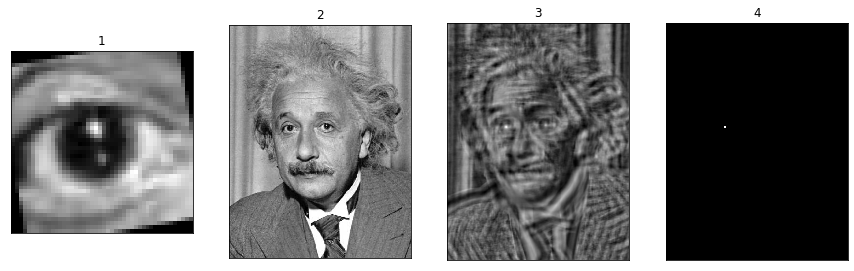

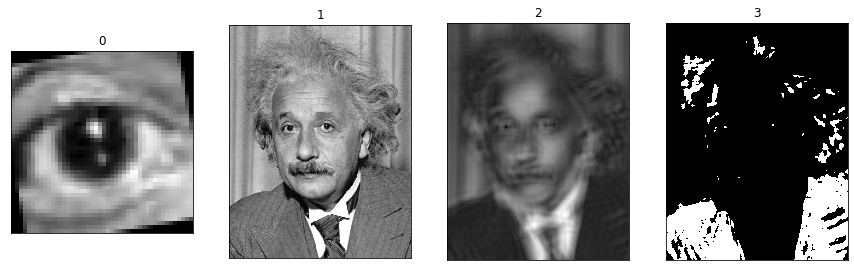

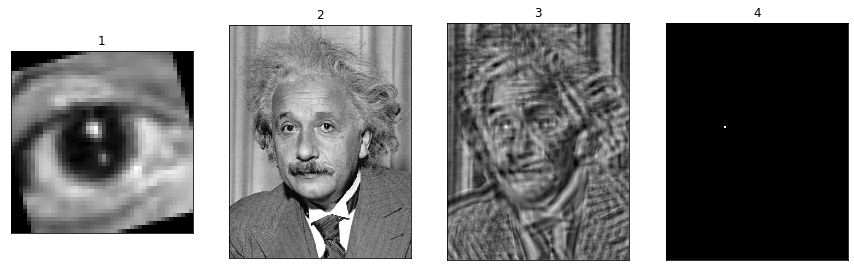

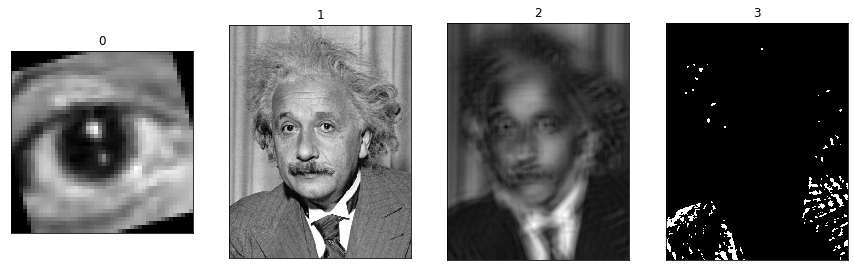

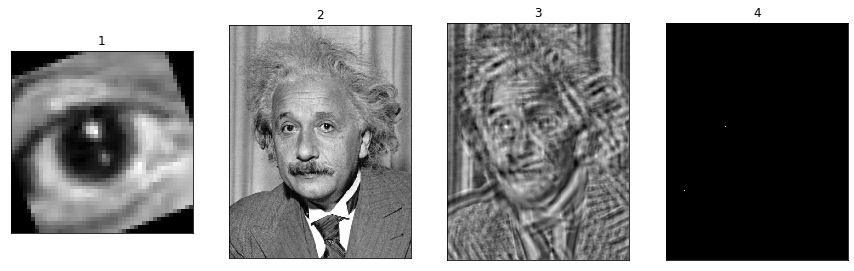

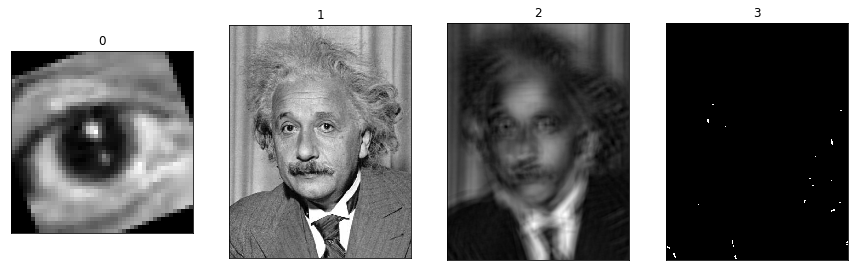

In [58]:
einstein = io.imread("images/einstein.png")
eye = io.imread("images/eye.png")

image = rgb2gray(einstein)
template = rgb2gray(eye)

for i in range(10, 25, 5):
    
    rotated_template = rotate(template, i)
    
    result = cross_correlation(image, rotated_template, threshold=0.46)
    images = [rotated_template, image] + result
    titles = ["1", "2", "3", "4"]

    visualize_image_group(images, titles)
    
    result = euclidean_distance(image,  rotated_template, threshold=10.8)
    images = [rotated_template, image] + result
    titles = [str(i) for i in range(4)]

    visualize_image_group(images, titles)

# 4.2 Histogram of Oriented Gradients


The Histogram of Oriented Gradients (HOG) feature descriptor is classical image descriptor for object detection.

Given the image 'car_template.png' and the folder 'cars', apply the HOG descriptor in order to detect where there is a car in the images in the folder 'car'. To this purpose, apply the "sliding window" technique. The algorithm can be:

a) Read the car template ('car_template.png') and obtain its HOG descriptor. Visualize it. [Help](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py) 

b) Read images from the folder "car", slide a window on each image, obtain the HOG descriptor and compare to the HOG descriptor of the car template. 

c) Visualize the location in the image that is the most similar to the car template. What distance will you use to compare both HOG descriptors of the car template and the image region? Compare if there is any difference in their results. 

d) Compute in how many images the cars were detected correctly and discuss the algorithm failures. What do you think can be the reasons for the failure?

Hint: the HOG detector function is in the skimage.feature library. 

If you want to accelerate algorithm execution, you can apply the sliding window with a step of X pixels (e.g. X=5).

Discuss what is the HOG descriptor, what are the parameters of the algorithm, which are the optimal values for the car detection testing several values of the parameters up to your criterion. Do you see any advantages of the HOG-based object detector compared to the template-based object detection? (The answer should be up to 10-15 lines).

a) Read the car template ('car_template.png') and obtain its HOG descriptor. Visualize it.

In [59]:
def get_HOG(image):
    
    """
    Function that returns the HOG of a given image.
    """
    
    image = img_as_float(rgb2gray(image))
    
    # Get the HOG of the previous image.
    return hog(image, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(3, 3), visualize=True)[1]
    
    #return exposure.rescale_intensity(hog_image, in_range=(0, 20))

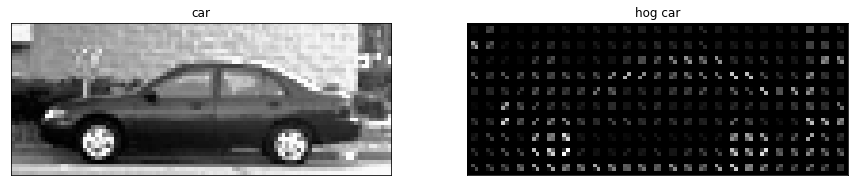

In [60]:
# Import the images.
car = io.imread("images/car_template.png")

# Store them neatly.
images = [car, get_HOG(car)]
titles = ["car", "hog car"]

# And visualize it all.
visualize_image_group(images, titles)

b) Read images from the folder "car", slide a window on each image, obtain the HOG descriptor and compare to the HOG descriptor of the car template. 

In [61]:
def compare_hogs(template, image):
    """
    Compara un template am una image mitjançant HOG
    :param template: Template que volem utilitzar
    :param image: Imatge a trobar el template amb HOG
    """
    # Generate the HOG of the template
    hog_template = get_HOG(template)

    dimensions = [image.shape[i] - template.shape[i] for i in range(2)]
    
    # Create a black image to put the HOG with the size of the original image
    result = np.ones([image.shape[0],image.shape[1]])
    
    data = []
    
    # Slicing with x of 5
    for i in range(0, dimensions[0], 5):
        for j in range(0, dimensions[1], 5):
            
            # Center for the result HOG to display
            posx = template.shape[0]+i-(int(template.shape[0]/2))
            posy = template.shape[1]+j-(int(template.shape[1]/2))
            
            # Get the region of the image to generate the HOG
            region = image[i:i+template.shape[0],j:j+template.shape[1]]
            hog_region_rescaled = exposure.rescale_intensity(get_HOG(region), in_range=(0,20))
            
            # Do euclidean distance with HOG of our region and our template
            hog_distance = np.linalg.norm(hog_region_rescaled - hog_template)
            result[posx,posy] = hog_distance
            
            # Save the information into the PriorityQueue
            data += [[hog_distance, [i, j]]]
        
    minims = [min(data)[1][1], min(data)[1][0]]
    
    # Generate two rectangles for the HOG and the original image
    rect = patches.Rectangle(minims, template.shape[1], template.shape[0], edgecolor='r', facecolor='none')
    rect1 = patches.Rectangle(minims, template.shape[1], template.shape[0], edgecolor='r', facecolor='none')

    return [template, image, result, rect, rect1]

In [62]:
def visualize_HOG(images, titles):
    
    figures, ax = plt.subplots(ncols=3, figsize=(15,20))
    ax[0].imshow(images[0], cmap='gray')
    ax[0].set_title(titles[0])
    ax[1].imshow(images[1], cmap='gray')
    ax[1].add_patch(images[3])
    ax[1].set_title(titles[1])
    ax[2].imshow(images[2], cmap='gray')
    ax[2].set_title(titles[2])
    ax[2].add_patch(images[4])
    plt.show()

Imatge numero:  0


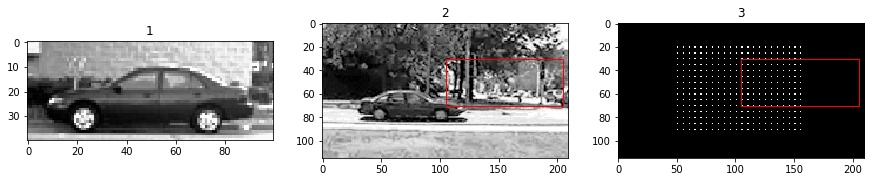

Imatge numero:  1


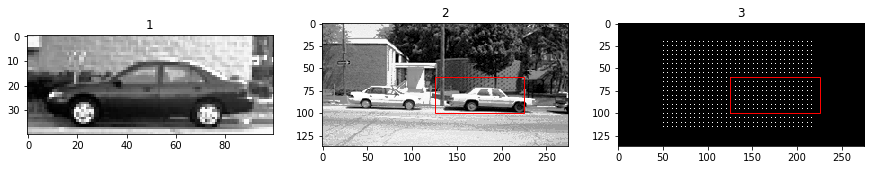

Imatge numero:  2


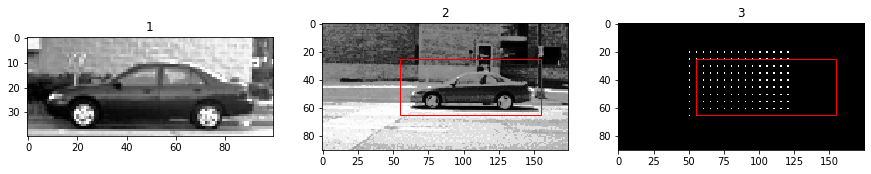

Imatge numero:  3


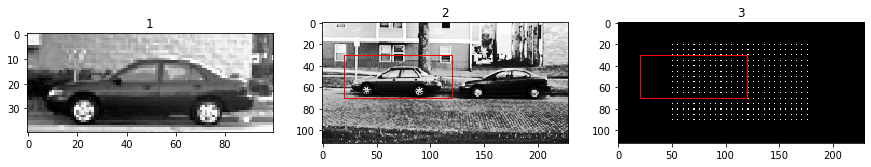

Imatge numero:  4


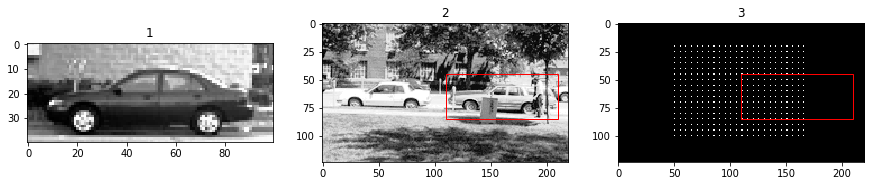

Imatge numero:  5


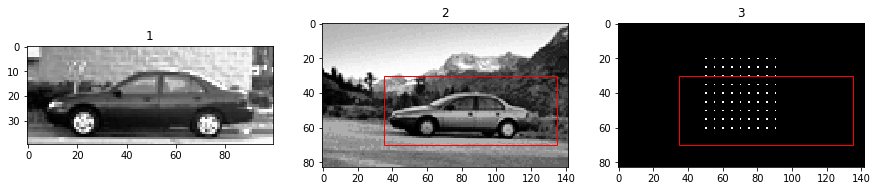

Imatge numero:  6


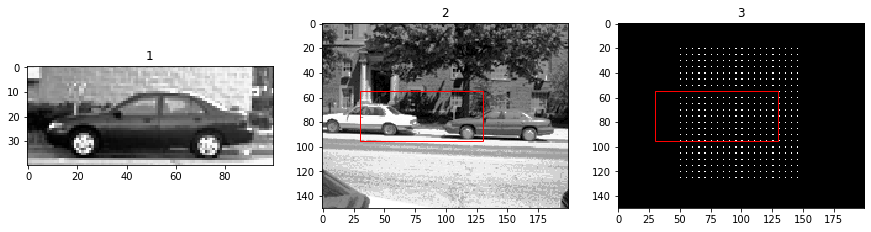

Imatge numero:  7


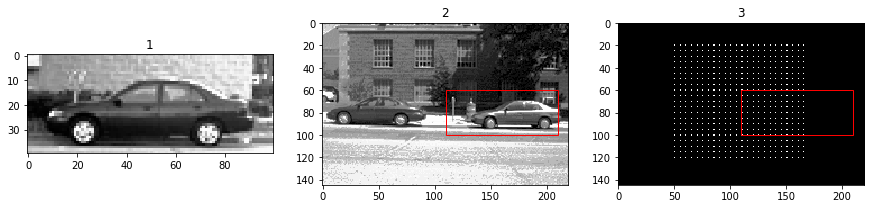

Imatge numero:  8


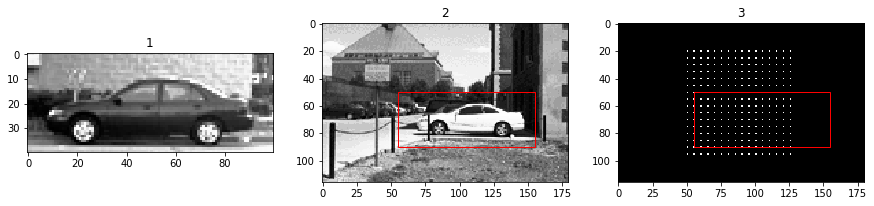

Imatge numero:  9


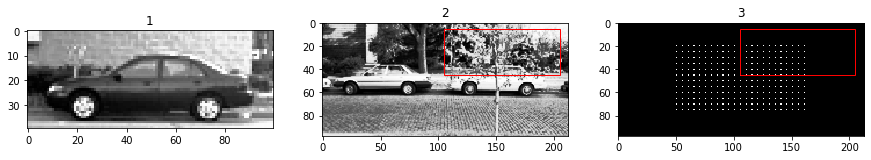

Imatge numero:  10


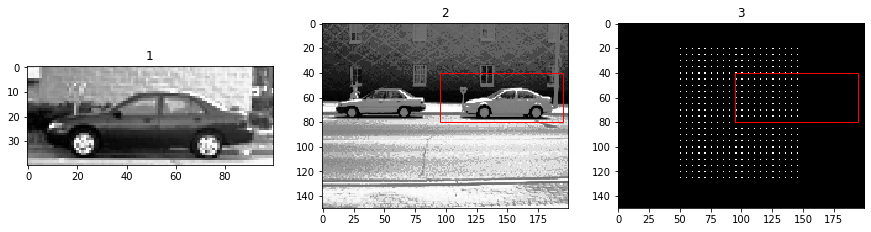

Imatge numero:  11


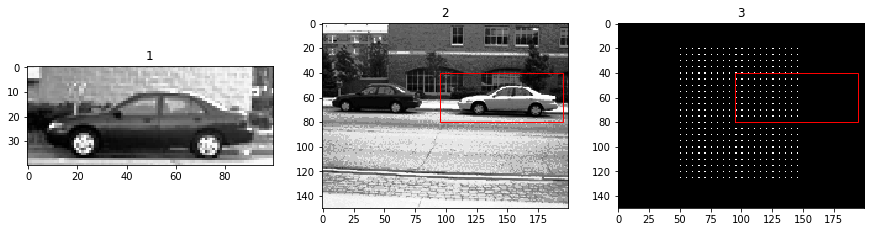

Imatge numero:  12


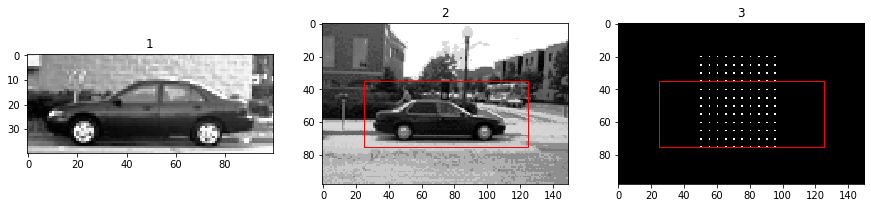

Imatge numero:  13


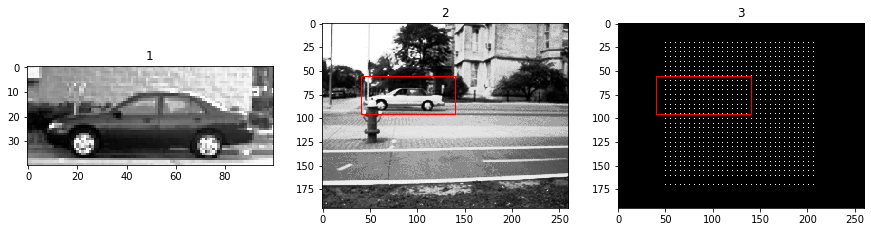

Imatge numero:  14


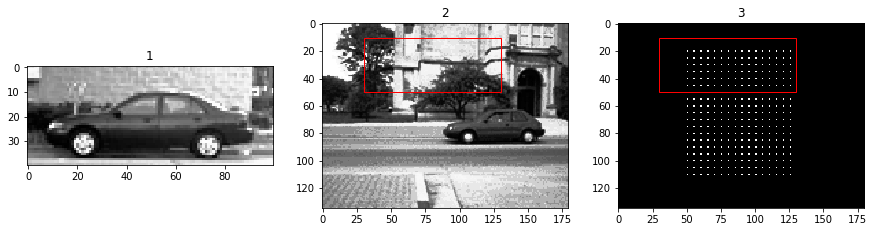

Imatge numero:  15


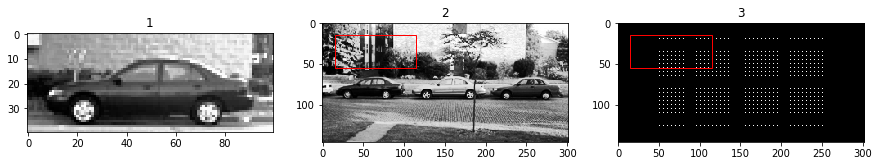

Imatge numero:  16


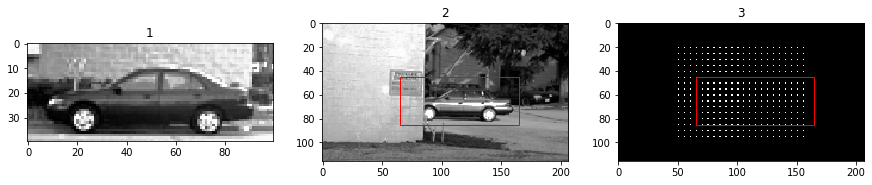

Imatge numero:  17


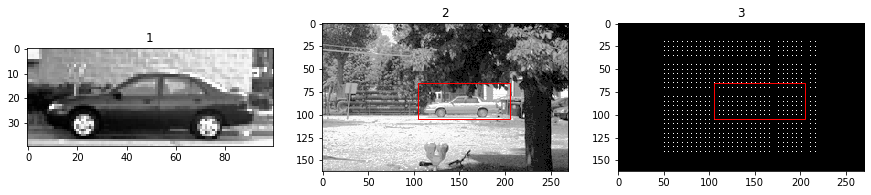

Imatge numero:  18


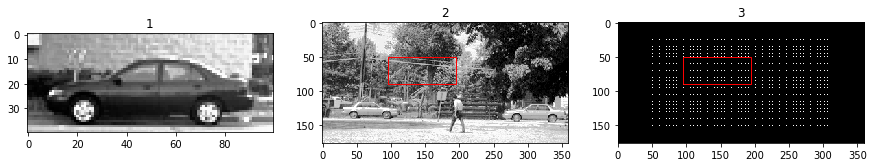

Imatge numero:  19


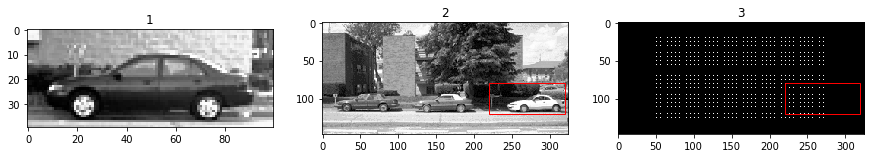

Imatge numero:  20


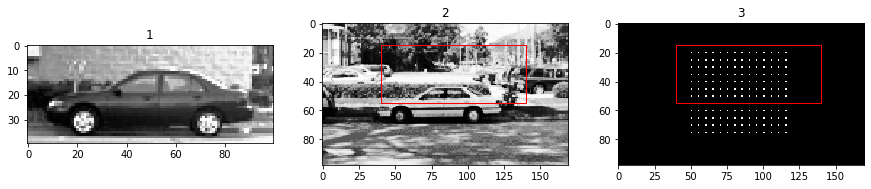

Imatge numero:  21


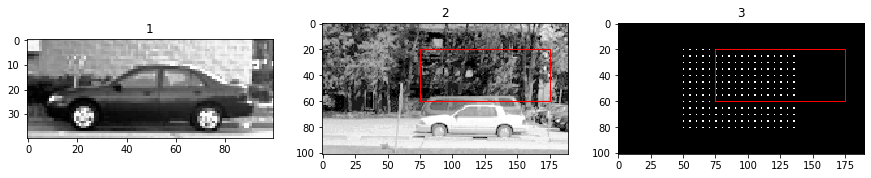

Imatge numero:  22


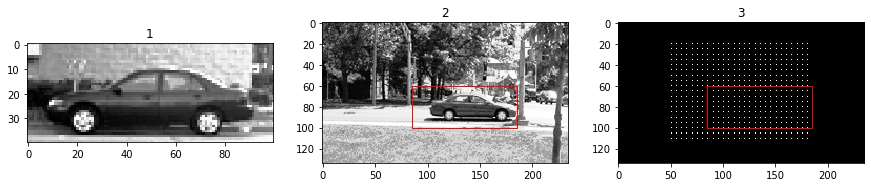

Imatge numero:  23


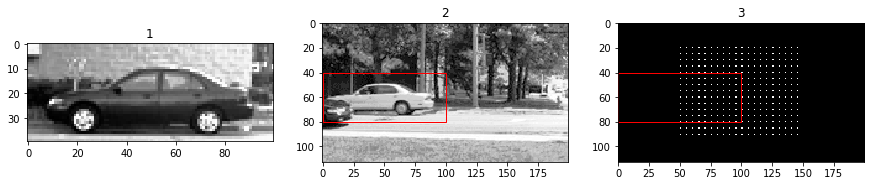

Imatge numero:  24


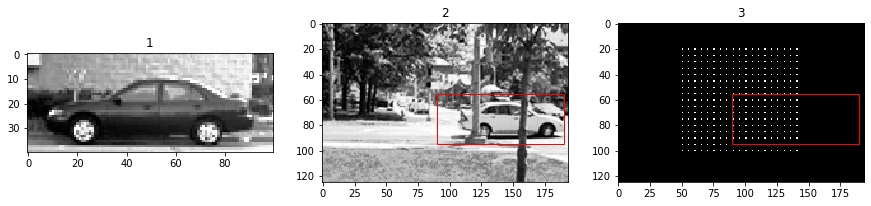

Imatge numero:  25


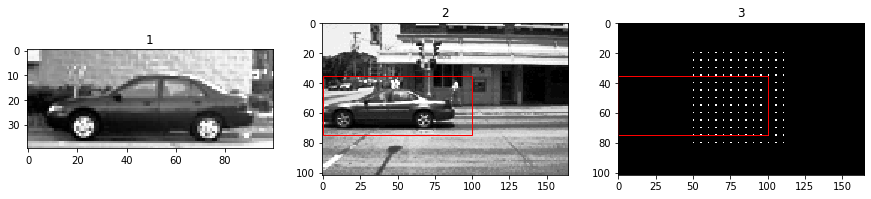

Imatge numero:  26


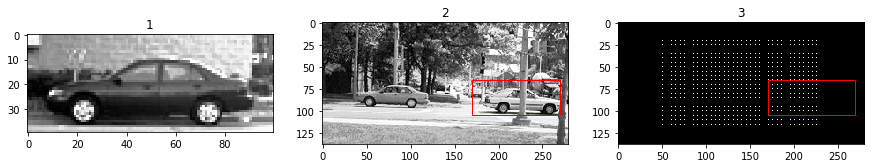

Imatge numero:  27


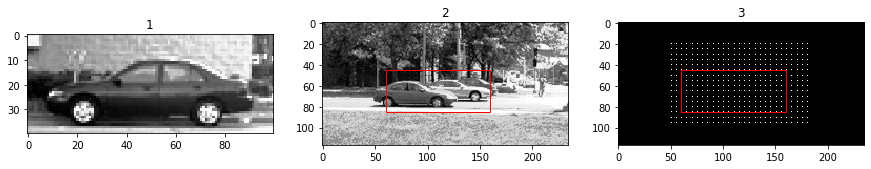

Imatge numero:  28


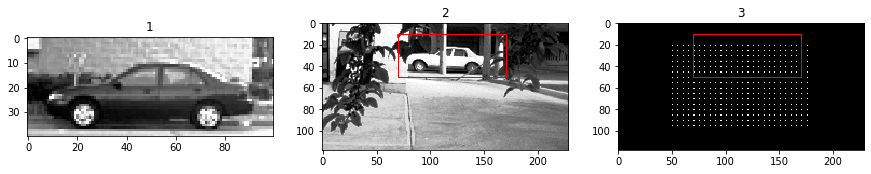

Imatge numero:  29


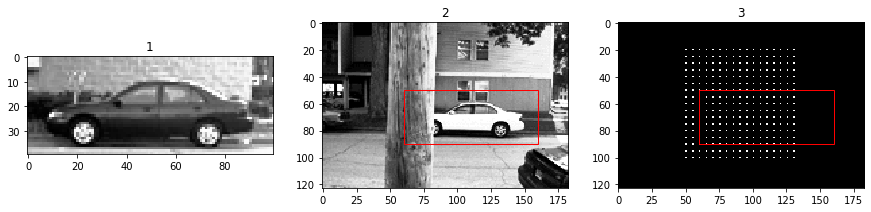

Imatge numero:  30


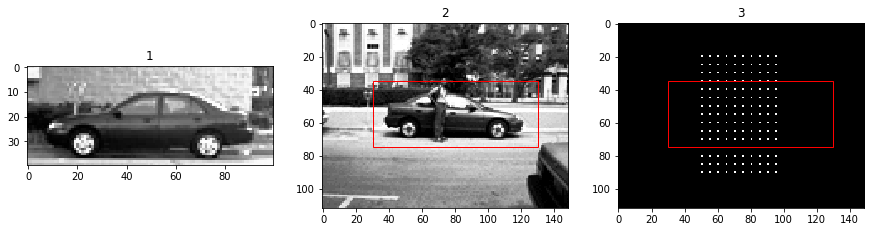

Imatge numero:  31


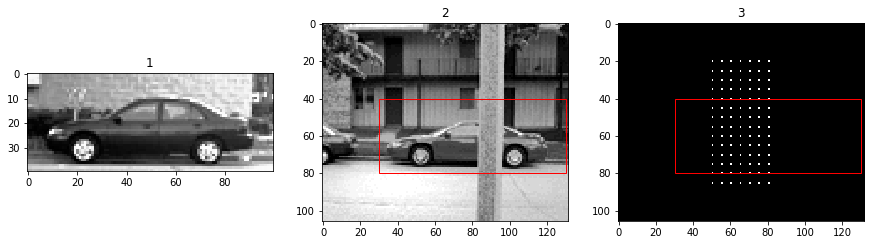

Imatge numero:  32


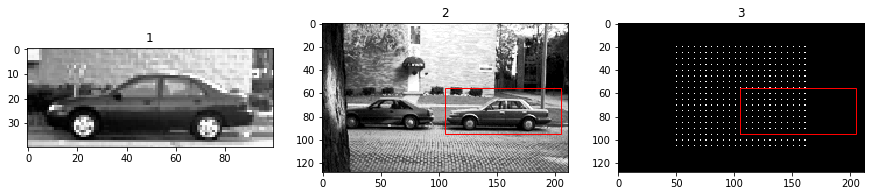

Imatge numero:  33


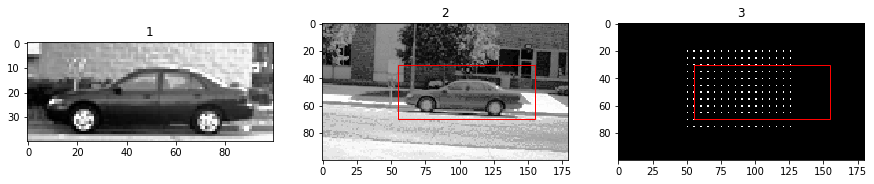

Imatge numero:  34


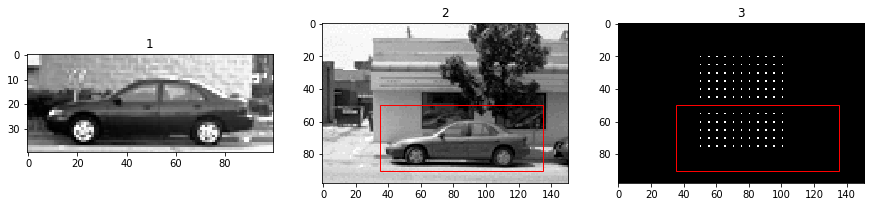

Imatge numero:  35


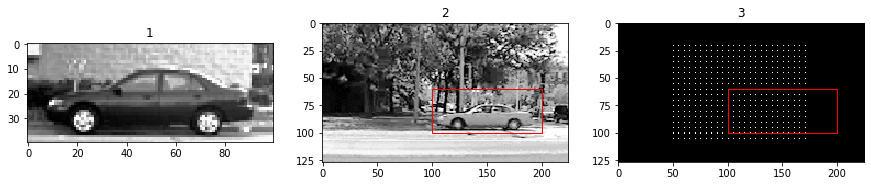

Imatge numero:  36


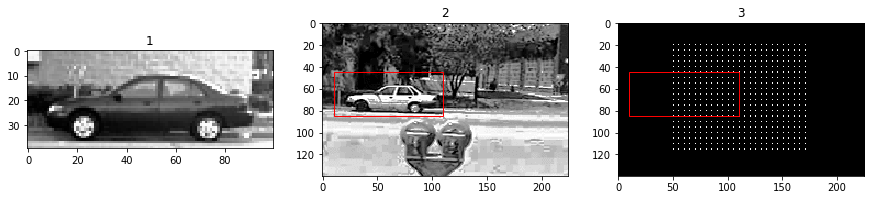

Imatge numero:  37


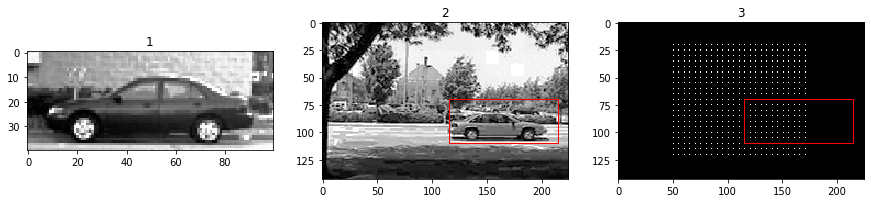

Imatge numero:  38


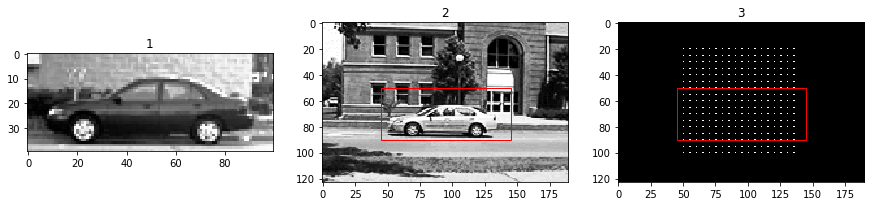

Imatge numero:  39


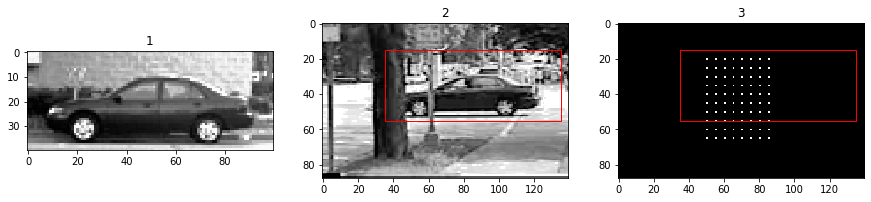

Imatge numero:  40


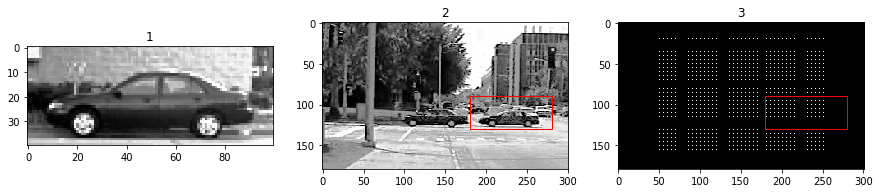

Imatge numero:  41


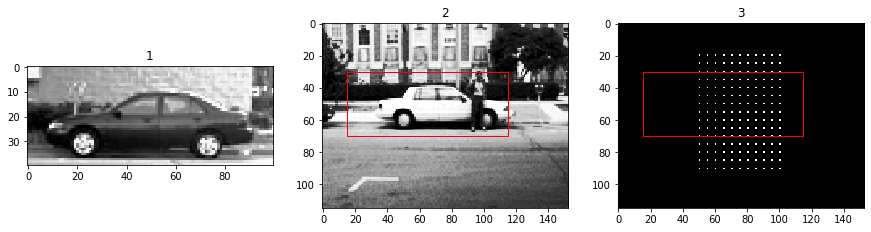

Imatge numero:  42


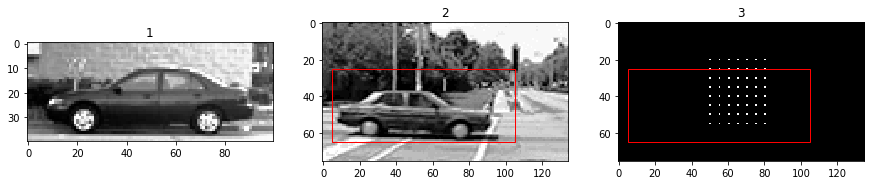

Imatge numero:  43


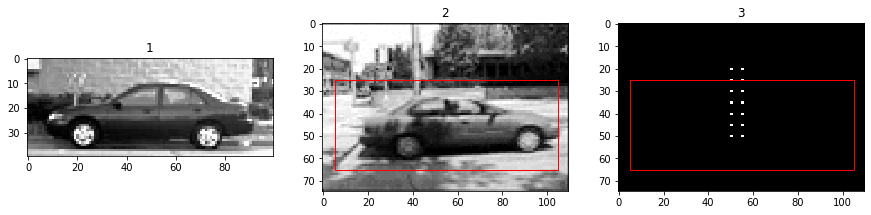

Imatge numero:  44


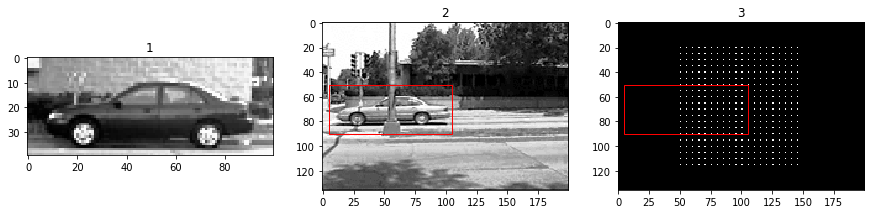

Imatge numero:  45


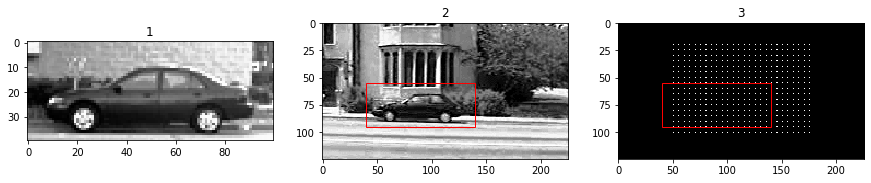

Imatge numero:  46


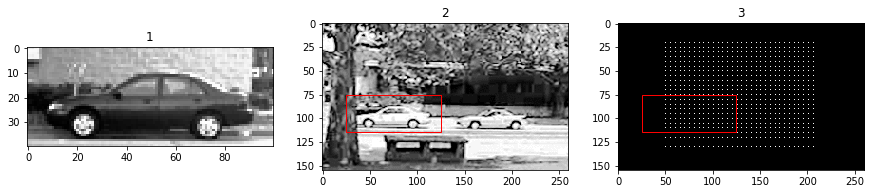

Imatge numero:  47


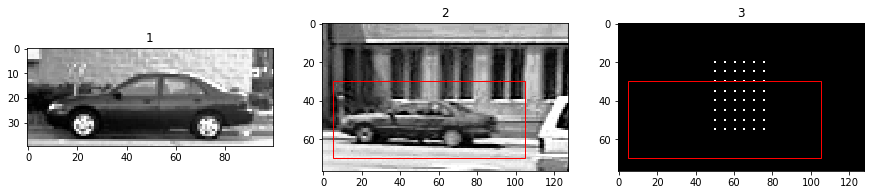

Imatge numero:  48


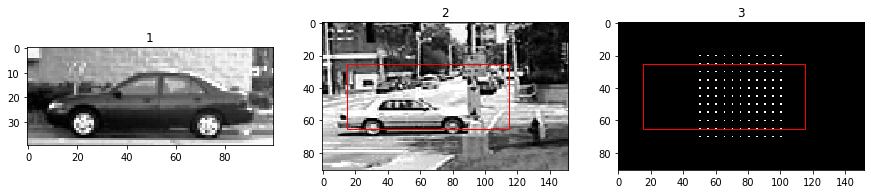

Imatge numero:  49


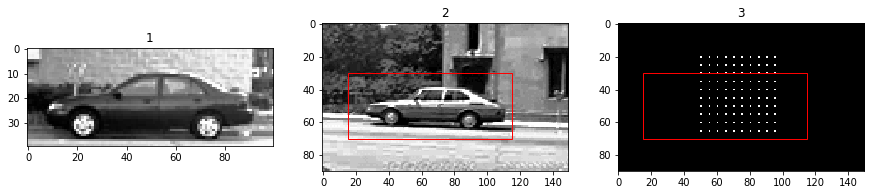

Imatge numero:  50


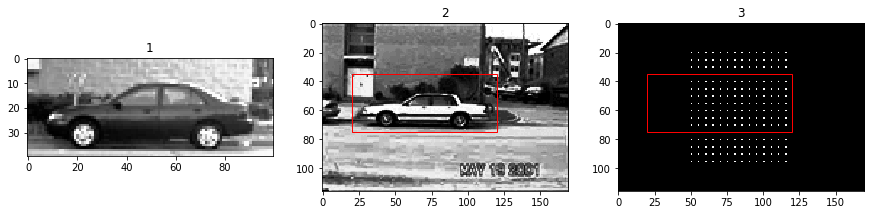

Imatge numero:  51


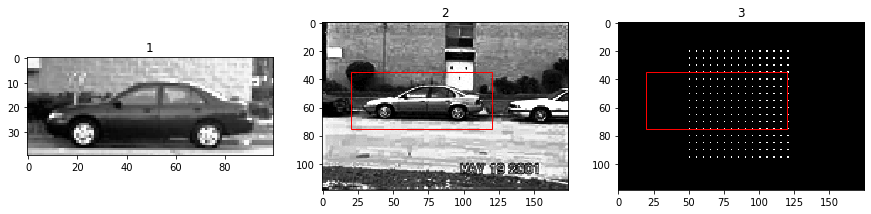

Imatge numero:  52


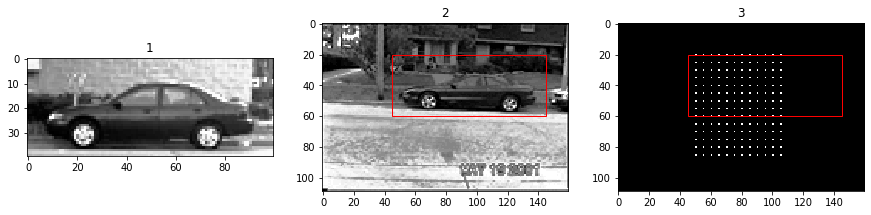

Imatge numero:  53


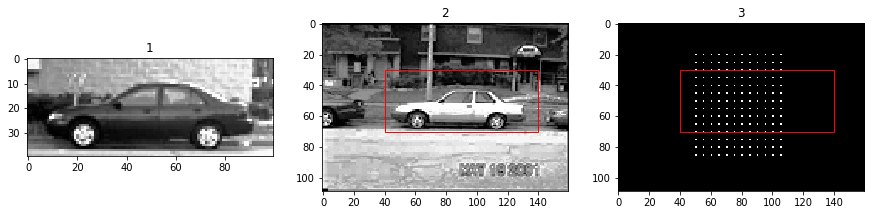

Imatge numero:  54


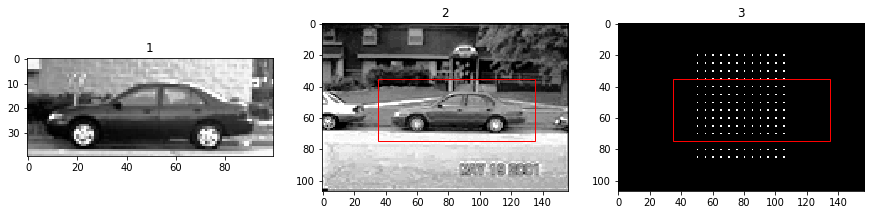

Imatge numero:  55


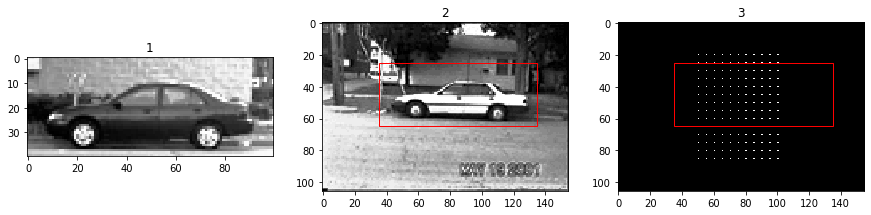

Imatge numero:  56


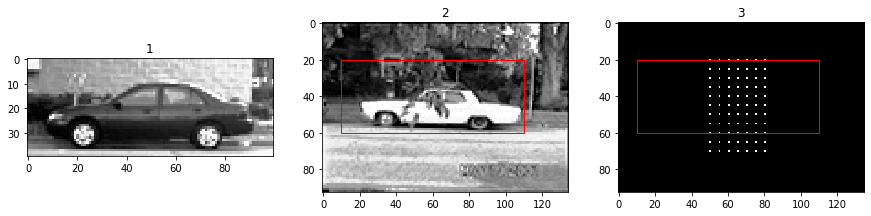

Imatge numero:  57


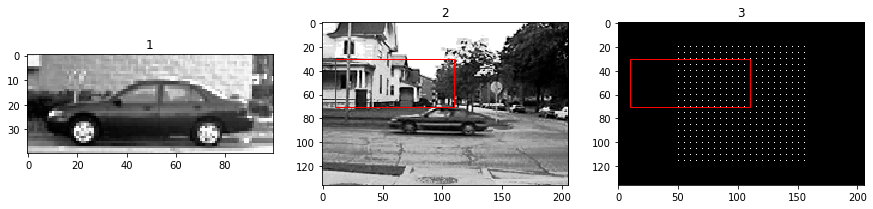

Imatge numero:  58


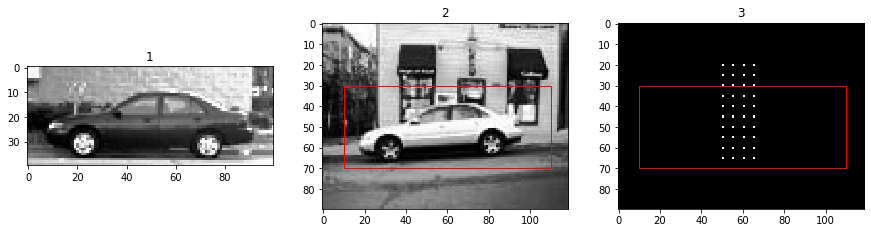

Imatge numero:  59


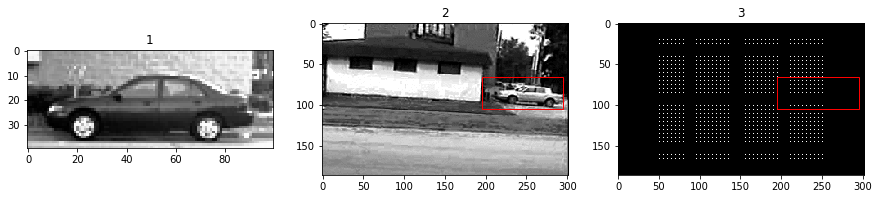

Imatge numero:  60


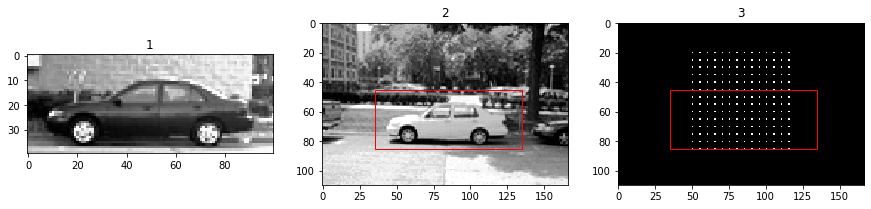

Imatge numero:  61


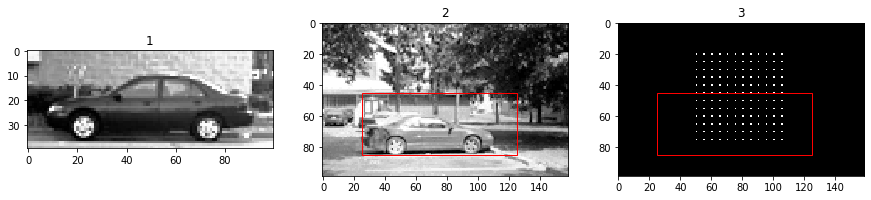

Imatge numero:  62


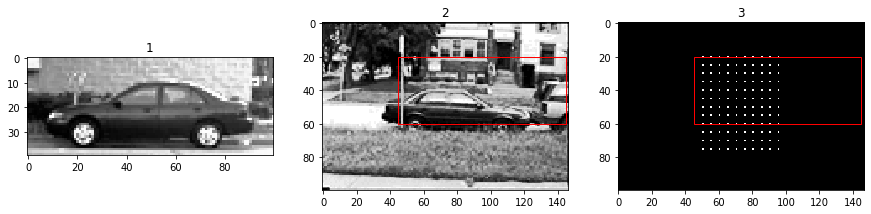

Imatge numero:  63


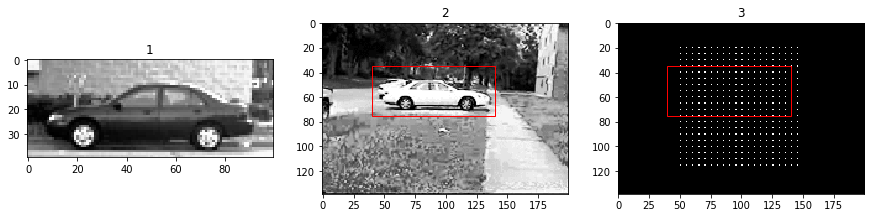

Imatge numero:  64


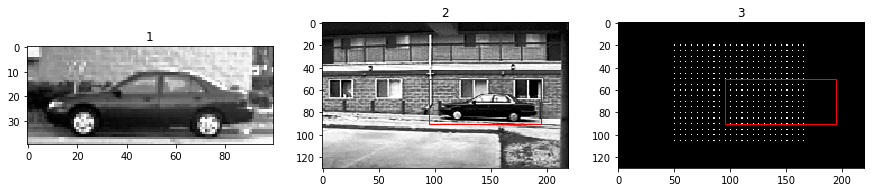

Imatge numero:  65


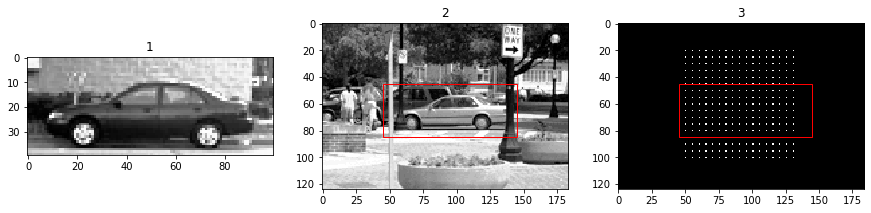

Imatge numero:  66


In [ ]:
ic = io.ImageCollection('./images/TestImages/*.pgm')
car = io.imread('./images/car_template.png')

for i,im in enumerate(ic):
    print("Imatge numero: ", i)
    visualize_HOG(compare_hogs(car, im), ["1", "2", "3"])

**d-Compute in how many images the cars were detected correctly and discuss the algorithm failures. What do you think can be the reasons for the failure?**

We count that over the X Car images that we passed to the algorithm,  the Algorithm only detected correctly X .

ESTA LINEA SE HA DE BORRAR PERO LA PONGO PARA QUE LUEGO RESTEMOS EL NUMERO DE TOTALES MENOS LOS FALLADOS Y ASÍ SABEMOS CUANTOS ESTÁN BIEN Fallan los números 0,9,14,15,18,21,57

We decided to consider detected correctly numbers: 6,20 even they are not detected 100% correctly.

The reason for the failure could be that in some images, the car has objects in front so we do not dettect correctly the car, another possibility is that the car that the algorith is trying to detect is not very similar to the template so it the algorithm can't detect the car correctly.



**Discuss what is the HOG descriptor, what are the parameters of the algorithm, which are the optimal values for the car detection testing several values of the parameters up to your criterion. Do you see any advantages of the HOG-based object detector compared to the template-based object detection?**

HOG descriptors are used in  HOG algorithms for generating histogram gradients of regions of the image. The histograms will be used to identify in with directions the images changes.

HOG has some parameters that we can change for improving image detectioncan, this parameters are orientations, pixels_per_cell, cells_per_block and visualize.
Orientations changes the number of directions of our histogram, increasing it would result in a better detection but it would requiere more time. Also if we lower it, the detection would be poorly because information would be lost.
Pixels_per_cell is the size in pixels of a cell.
Cells_per_block is the number of cells in each block.


A advantages that we see i that HOG is better than the template-based object detection because HOG is not affected by contrast, ilumantion etc.

A disadvantage is that sometimes the algorithm does not dettect objects that are in a different direction of the template

# 4.3 ORB feature detector and binary descriptor

Let us consider the problem of feature extraction that contains two subproblems: 
- feature location, 
- image feature description.

In theory classes, we saw two feature extraction methods: SIFT and ORB. Let us focus on ORB.

**4.3.1** Check if ORB is  scale and rotation invariant, a property that is very important for real-time applications.

**Hint:** `ORB` is a function within the module `skimage.feature`
                             
**Help**: We suggest to have a look at the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) how to compute the ORB descriptors and find the descriptors match. You can use the function match_descriptors from `skimage.feature` module in order to compute and show the similar detected descriptors of the given images. 

a) Detect the correspondences between the model image `starbucks.jpg` with the scene image `starbucks6.jpg`. You can adapt the code from the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) above. Define the algorithm in terms of functions in order to be able to apply it on different images. Comment the code in detail.

Hint: If the function plot_matches() gives you an error you can use the plot_matches_aux() at the end of this file.

In [ ]:
def orb_images(model, scene):
    
    # Get the converted image.
    model = img_as_float(rgb2gray(model))
    
    data = []
    
    # For all the photos that we will compare with the model.
    for frame in scene:
        
        # Get the converted image.
        frame = img_as_float(rgb2gray(frame))
        
        descriptor_extractor = ORB(n_keypoints=200)
        
        images = [model, frame]
        keypoints = []
        descriptors = []
        
        # For the model and a concrete frame.
        for image in images:
            descriptor_extractor.detect_and_extract(image)
            keypoints += [descriptor_extractor.keypoints]
            descriptors += [descriptor_extractor.descriptors]
            
        # Obtain the common points between the two images.
        matches = match_descriptors(descriptors[0], descriptors[1], cross_check=True)
        data += [[images, keypoints, matches]]
        
    return data

In [ ]:
def visualize_matches(images):

    # For all the comparisons.
    for item in images:

        # Print how common are both images.
        print('Similariry: ', abs(len(item[2]) / 2), '%')

        # Declare the plot where we will show the image.
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 15))

        # Show both images and its matches.
        plot_matches(ax, item[0][0], item[0][1], item[1][0], item[1][1], item[2])
        ax.axis('off')
        ax.set_title("Original_Starbucks_Image - Starbucks_Image_Colection")
        plt.show()

In [ ]:
# Import the images.
model = io.imread('./images/starbucks.jpg')
scene = io.imread('./images/starbucks6.jpg')

# Visualize the results of the ORB algorithm for the two previous images.
visualize_matches(orb_images(model, [scene]))

b) Repeate the experiment comparing the "starbucks.jpg" image as a model, and showing its matches to all Starbucks images, sorting them based on their similarity to the model. Comment when the algorithm works best. 

In [ ]:
def byMatching(item):
    
    """
    Function that returns the length of the third item of a list.
    Useful for getting the amount of matches that share two images.
    """
    
    return len(item[2])

In [ ]:
# Import the images.
scene = io.ImageCollection('images/starbucks*')
model = io.imread('./images/starbucks.jpg')

# Get the results of the ORB algorithm.
orbed = orb_images(model, scene)

# Sort in inverse order by the length of the matches.
orbed.sort(key=byMatching, reverse=True)

# Visualize all.
visualize_matches(orbed)

c) Repeate the experiment in (b): 
- Changing the orientation of the model image by rotating it and comparing it with its original version. Help: you can use the rotate() function from skimage.transform 
- Change the scale and orientation of the scene image and compare it with the model image.

Help: To do so, you can use the function given below as example:

import transform as tf
rotationdegrees = 180
img_rotated = tf.rotate(image2transform, rotationdegrees)

or

tform = tf.AffineTransform(scale=(1.2, 1.2), translation=(0, -100))
img_transformed = tf.warp(image2transform, tform)

In [ ]:
def rotate_image(model, rotationdegrees):
    
    """
    Function that rotates and scales a given image and returns it.
    """
    
    # Declare the transformation that we will use.
    tform = AffineTransform(scale=(1.2, 1.2), translation=(0, -100))
    
    # Return the rotated image.
    return warp(rotate(model, rotationdegrees), tform)

In [ ]:
# Import the images.
model = io.imread('./images/starbucks.jpg')
scene = rotate_image(model, 180)

# Visualize the results of the ORB algorithm for the two previous images.
visualize_matches(orb_images(model, [scene]))

**Optional:** Repeate the experiment with a new group of images. You could use Coca-Cola advertisements or from another famous brand, easily to find on internet.



### Analysis of the applied techniques and results

- What are the advantages of the ORB object detection with respect to the HOG and template object detector?

- What would happen if you analyse an image that does not contain the Starbucks logo? 

- Could you think of ways of defining a quality measure for the correspondance between two images? (no need of implementing it) 

1) The advantage that we have is  that even we rotate, resize or change the contrast or ilumination, ORB detection matches the object that we want to search.
Thats really useful because we can still detect the object even he has different forms.
For all this facts we can say that ORB is better for detecting the objects

2) If we analyse an image that without the Starcuks logo the algorith will find the most similar points of the logo into the image. So even the image does not contain the logo, we can have matches.

3) We could search which descriptors the algorithm has matched more matches and then try to find with image is more similar.
After that we could calculate the percentatge for knowing which of them is the most similar to the logo image, if we get a hundred percentatge that would mean that the image is perfectly matched, lower percentatge would mean less matching.


## Delivery

All code sould be commented in English. Answers of the questions should be given in English too.

Compressed file **P4_Student1_Student2.zip** that includes:
- The notebook P1_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
- The images used that are not provided in P1.zip.

**Deadline (Campus Virtual): November 26th, 23:59.** 

In [ ]:
#Appendix: In case the plot_matches() function gives you some problems, you can use the following one:

from skimage.util import img_as_float
import numpy as np

def plot_matches_aux(ax, image1, image2, keypoints1, keypoints2, matches,
                 keypoints_color='k', matches_color=None, only_matches=False):
    """Plot matched features.
    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Matches and image are drawn in this ax.
    image1 : (N, M [, 3]) array
        First grayscale or color image.
    image2 : (N, M [, 3]) array
        Second grayscale or color image.
    keypoints1 : (K1, 2) array
        First keypoint coordinates as ``(row, col)``.
    keypoints2 : (K2, 2) array
        Second keypoint coordinates as ``(row, col)``.
    matches : (Q, 2) array
        Indices of corresponding matches in first and second set of
        descriptors, where ``matches[:, 0]`` denote the indices in the first
        and ``matches[:, 1]`` the indices in the second set of descriptors.
    keypoints_color : matplotlib color, optional
        Color for keypoint locations.
    matches_color : matplotlib color, optional
        Color for lines which connect keypoint matches. By default the
        color is chosen randomly.
    only_matches : bool, optional
        Whether to only plot matches and not plot the keypoint locations.
    """

    image1 = img_as_float(image1)
    image2 = img_as_float(image2)

    new_shape1 = list(image1.shape)
    new_shape2 = list(image2.shape)

    if image1.shape[0] < image2.shape[0]:
        new_shape1[0] = image2.shape[0]
    elif image1.shape[0] > image2.shape[0]:
        new_shape2[0] = image1.shape[0]

    if image1.shape[1] < image2.shape[1]:
        new_shape1[1] = image2.shape[1]
    elif image1.shape[1] > image2.shape[1]:
        new_shape2[1] = image1.shape[1]

    if new_shape1 != image1.shape:
        new_image1 = np.zeros(new_shape1, dtype=image1.dtype)
        new_image1[:image1.shape[0], :image1.shape[1]] = image1
        image1 = new_image1

    if new_shape2 != image2.shape:
        new_image2 = np.zeros(new_shape2, dtype=image2.dtype)
        new_image2[:image2.shape[0], :image2.shape[1]] = image2
        image2 = new_image2

    image = np.concatenate([image1, image2], axis=1)

    offset = image1.shape

    if not only_matches:
        ax.scatter(keypoints1[:, 1], keypoints1[:, 0],
                   facecolors='none', edgecolors=keypoints_color)
        ax.scatter(keypoints2[:, 1] + offset[1], keypoints2[:, 0],
                   facecolors='none', edgecolors=keypoints_color)

    ax.imshow(image, interpolation='nearest', cmap='gray')
    ax.axis((0, 2 * offset[1], offset[0], 0))

    for i in range(matches.shape[0]):
        idx1 = matches[i, 0]
        idx2 = matches[i, 1]

        if matches_color is None:
            color = np.random.rand(3)
        else:
            color = matches_color

        ax.plot((keypoints1[idx1, 1], keypoints2[idx2, 1] + offset[1]),
                (keypoints1[idx1, 0], keypoints2[idx2, 0]),
                '-', color=color)